In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.pyplot import rcParams

rcParams.figsize=(15,8)

In [2]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis=1)
y = data['median_house_value']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15324, 9)
(5109, 9)
(15324,)
(5109,)


In [9]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2830,-119.01,35.40,11.0,8739.0,2190.0,4781.0,1919.0,1.7109,INLAND
14951,-116.96,32.71,18.0,2413.0,533.0,1129.0,551.0,2.4567,<1H OCEAN
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,ISLAND
14271,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531,NEAR OCEAN
305,-122.18,37.76,43.0,2018.0,408.0,1111.0,367.0,1.8913,NEAR BAY
...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY


In [10]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2830,-119.01,35.40,11.0,8739.0,2190.0,4781.0,1919.0,1.7109,INLAND,44600.0
14951,-116.96,32.71,18.0,2413.0,533.0,1129.0,551.0,2.4567,<1H OCEAN,155000.0
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,ISLAND,450000.0
14271,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531,NEAR OCEAN,65700.0
305,-122.18,37.76,43.0,2018.0,408.0,1111.0,367.0,1.8913,NEAR BAY,91200.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

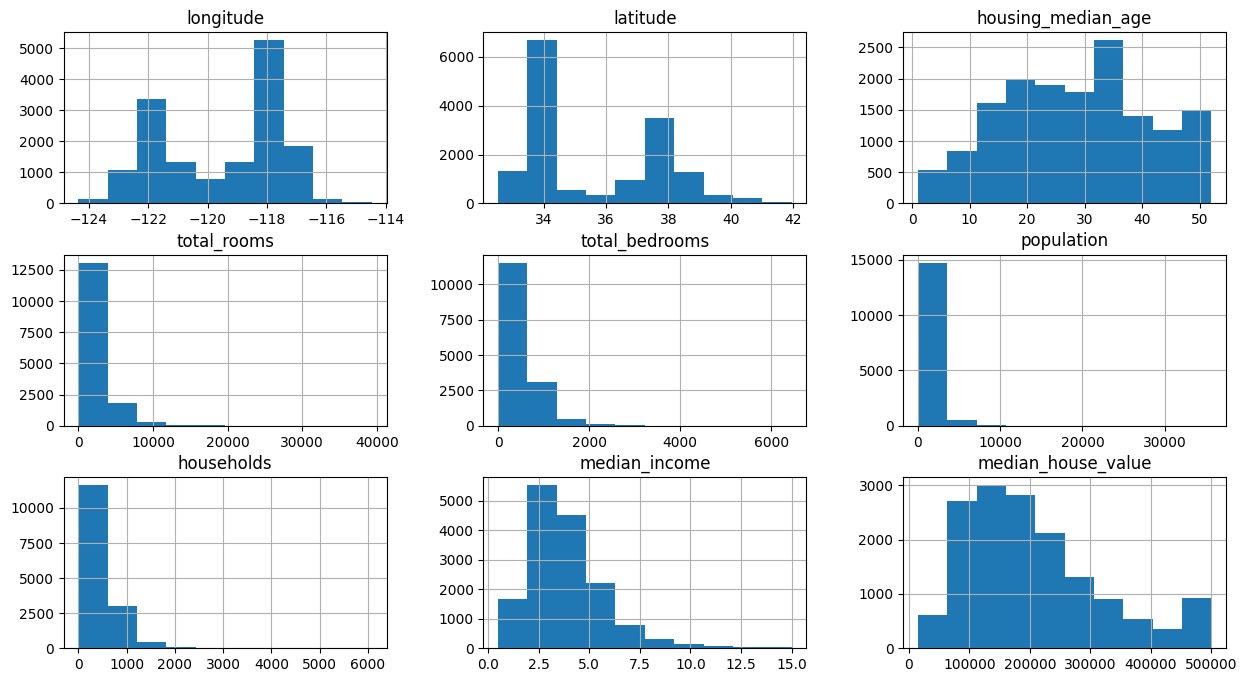

In [11]:
train_data.hist(figsize=(15,8))

<ipython-input-12-a478d1bda628>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_train.corr(), annot=True, cmap="Set2")


<Axes: >

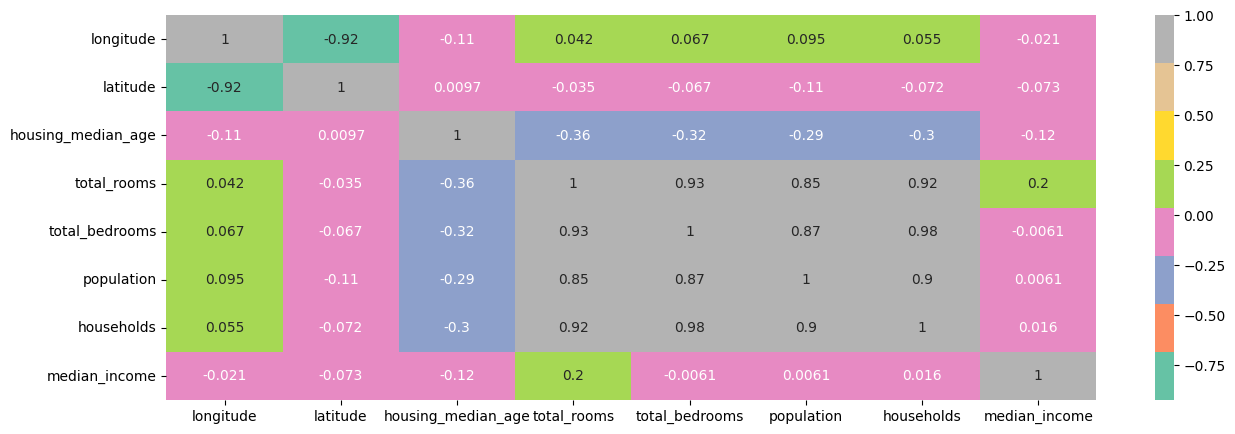

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(x_train.corr(), annot=True, cmap="Set2")

# Feature Engineering

In [13]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [14]:
train_data['total_rooms'] = np.log(train_data.total_rooms + 1)
train_data['total_bedrooms'] = np.log(train_data.total_bedrooms + 1)
train_data['population'] = np.log(train_data.population + 1)
train_data['households'] = np.log(train_data.households + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

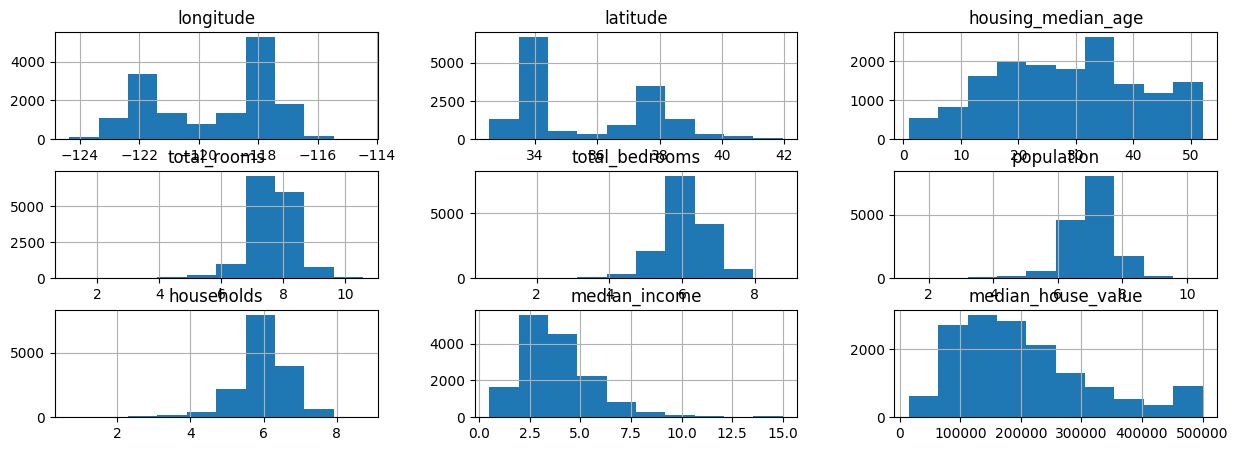

In [15]:
train_data.hist(figsize=(15,5))

In [16]:
train_data = train_data.join(pd.get_dummies(x_train.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2830,-119.01,35.40,11.0,9.075665,7.692113,8.472614,7.560080,1.7109,44600.0,0,1,0,0,0
14951,-116.96,32.71,18.0,7.789040,6.280396,7.029973,6.313548,2.4567,155000.0,1,0,0,0,0
8314,-118.32,33.35,27.0,7.424165,6.257668,6.613384,5.805135,2.1579,450000.0,0,0,1,0,0
14271,-117.12,32.70,38.0,6.708084,5.384495,6.860664,5.446737,1.0531,65700.0,0,0,0,0,1
305,-122.18,37.76,43.0,7.610358,6.013715,7.013915,5.908083,1.8913,91200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

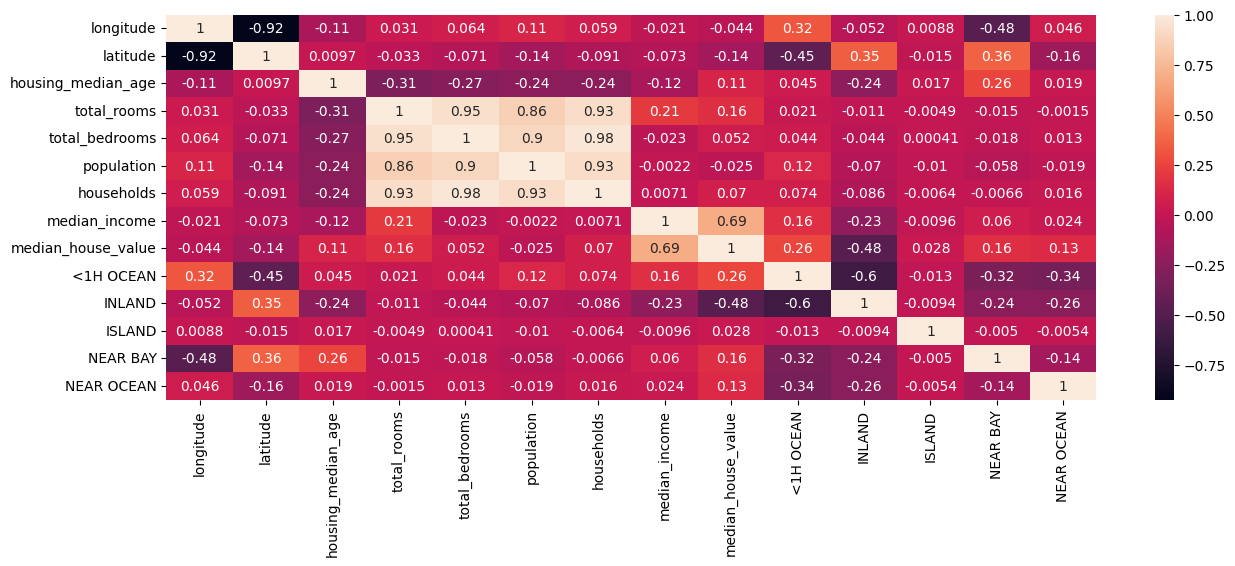

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(train_data.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

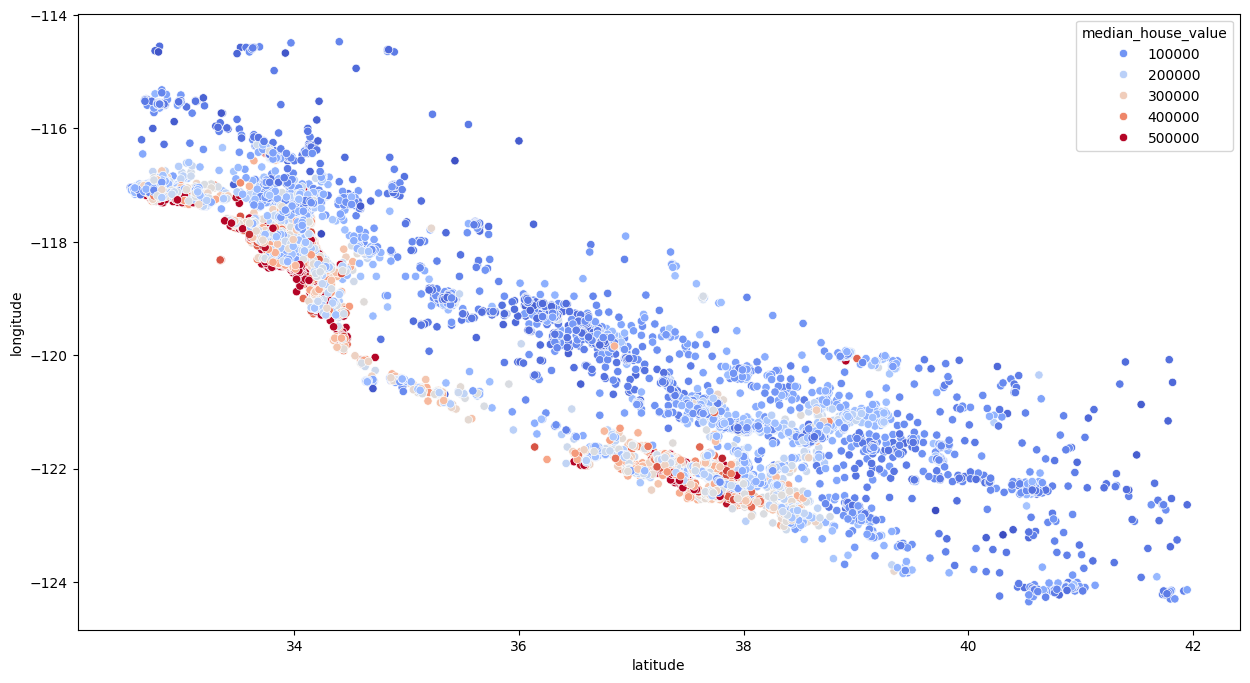

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')

This shows that the coastal houses, with lower latitude and longitude are expensive. they have higher "median_house_value"

In [19]:
# peprating a column for bedroom ratio
train_data['bedrooms_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,household_rooms
2830,-119.01,35.40,11.0,9.075665,7.692113,8.472614,7.560080,1.7109,44600.0,0,1,0,0,0,0.847554,1.200472
14951,-116.96,32.71,18.0,7.789040,6.280396,7.029973,6.313548,2.4567,155000.0,1,0,0,0,0,0.806312,1.233703
8314,-118.32,33.35,27.0,7.424165,6.257668,6.613384,5.805135,2.1579,450000.0,0,0,1,0,0,0.842878,1.278896
14271,-117.12,32.70,38.0,6.708084,5.384495,6.860664,5.446737,1.0531,65700.0,0,0,0,0,1,0.802687,1.231578
305,-122.18,37.76,43.0,7.610358,6.013715,7.013915,5.908083,1.8913,91200.0,0,0,0,1,0,0.790201,1.288126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0,0.776717,1.308200
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0,0.800481,1.255281
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0,0.801871,1.251124
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0,0.805704,1.242326


<Axes: >

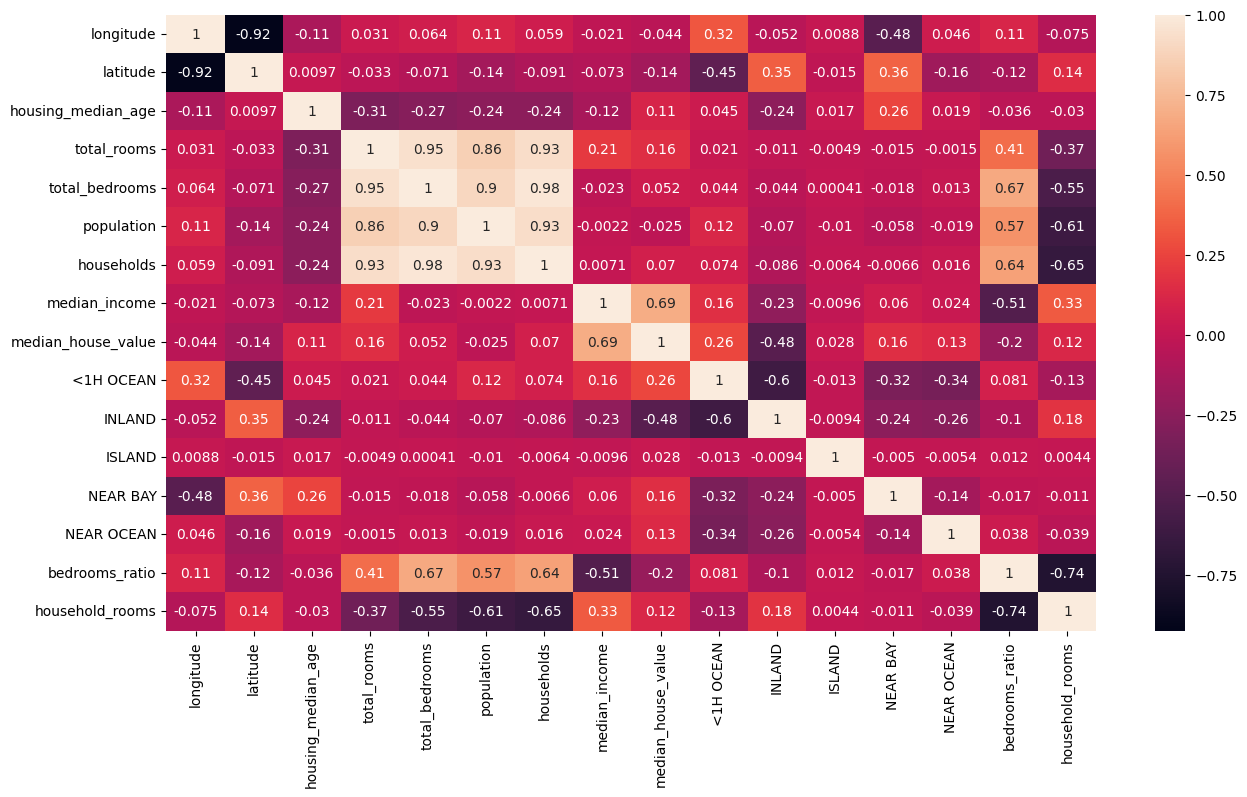

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linreg = LinearRegression()

In [24]:
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

In [39]:
linreg.fit(x_train_s, y_train)

LinearRegression()

In [30]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data.total_rooms + 1)
test_data['total_bedrooms'] = np.log(test_data.total_bedrooms + 1)
test_data['population'] = np.log(test_data.population + 1)
test_data['households'] = np.log(test_data.households + 1)

test_data = test_data.join(pd.get_dummies(x_test.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedrooms_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [32]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,household_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,0,0,0,0,1,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,0,1,0,0,0,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,1,0,0,0,0,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,0,0,0,1,0,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,0,1,0,0,0,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14148,-117.08,32.73,36.0,7.055313,5.389072,6.429719,5.455321,3.6125,0,0,0,0,1,0.763832,1.293290
14743,-117.06,32.58,11.0,7.965546,6.522093,7.649216,6.513230,3.5125,0,0,0,0,1,0.818788,1.222979
19496,-121.00,37.66,43.0,7.770645,6.025866,6.851185,6.047372,3.2632,0,1,0,0,0,0.775465,1.284962
20553,-121.79,38.68,24.0,8.241440,6.744059,7.707962,6.762730,2.8068,0,1,0,0,0,0.818311,1.218656


In [41]:
linreg.score(x_test_s, y_test)

0.6759916001649118

# Scaling the dataset

scaling is done to make the values of the dataset range between 0 and 1

In [36]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

# **Random Forest**

 using randdom forest ensemble technique to perform regression analysis.

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Unscaled data

In [55]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
forest.score(x_test, y_test)

0.8196908628095921

# Scaled data

In [57]:
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [58]:
forest.score(x_test_s, y_test)

0.799012555059884

# Hyperparameter Tunning

done to pick the best parameters for the best accuracy of our model

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    "max_depth": [None, 4, 8],
    "min_samples_split": [2, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [69]:
best_forest = grid_search.best_estimator_

In [70]:
best_forest.score(x_test_s, y_test)

0.8003317100894295